# **FRUIT IDENTIFICATION USING RESENT9 ARCHITECTURE BASED CNN DEEP LEARNING MODE**L
Fruits are very good source of ***Nutrients*** and ***Fiber***. They are juicy & sweet and also impart ***Freshness*** in our diet.
As important it is to eat foods, it is also very important to identify what fruit are we exactly eating, sometimes people with conditions require fruits which are rich in some particular Nutrient or Fiber.

***The very aim of this Deep learning Model is to predict the label/name of the given Fruit just by looking at it's Picture***.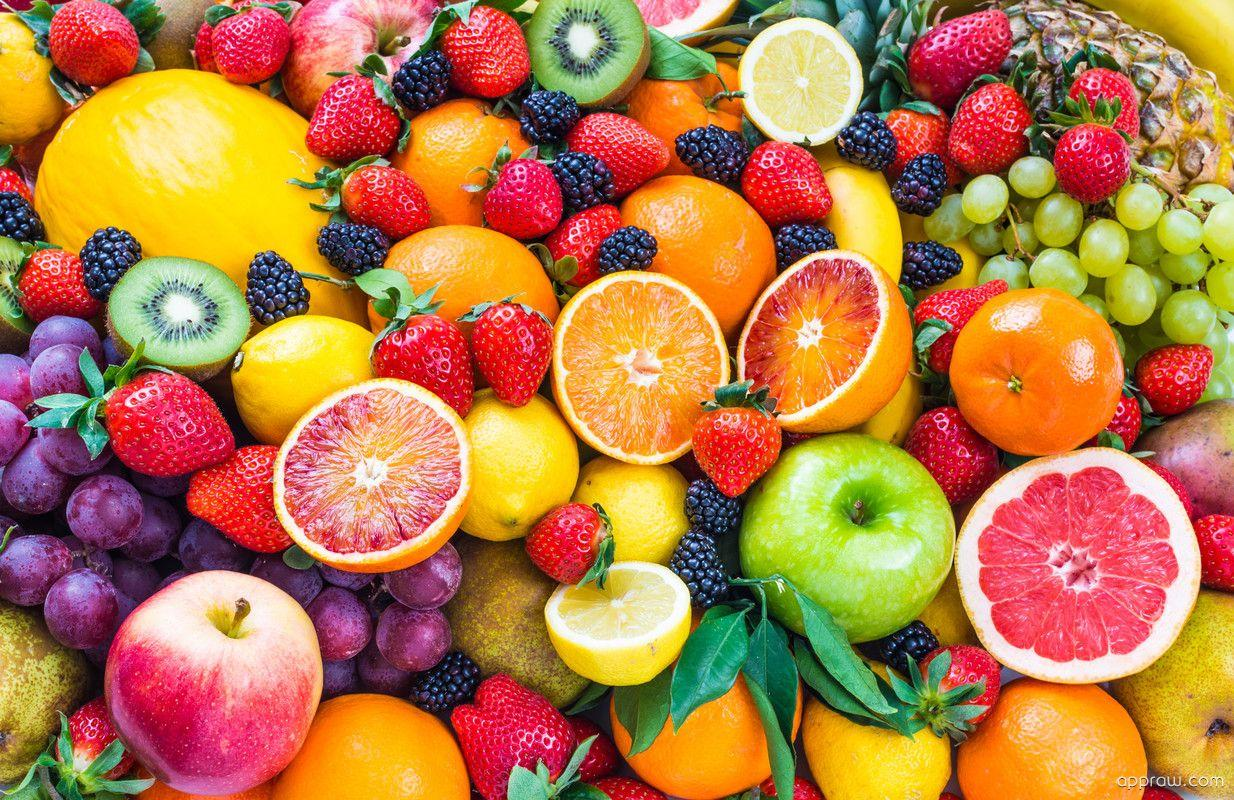 

*TABLE OF CONTENTS* :-

1) IMPORTING REQUIRED LIBRARIES

2) DOWNLOADING THE DATASET FROM KAGGLE 

3) CALCULATING MEAN AND STD DEVIATION OF IMAGES FOR DATA AUGEMENTATION

4) IMPORTING THE TRAINING AND VALIDATION DATASET USING IMAGEFOLDER METHOD OF PYTORCH AND AUGEMENTING & NORMALISING THE DATA.

5) CREATING DATALOADERS TO RETREIVE BATCHES OF IMAGES.

6) SHIFTING THE DATALOADERS ON THE GPU.

7) EXTENDING THE nn.Module CLASS FOR REQUIRED FUNCTIONS.

8) DEFINING THE MAIN RESNET9 ARCHITECTURE BASED CNN MODEL.

9) DEFINING THE MODEL OBJECT AND SHIFTING IT ON THE GPU.

10) TRAINING THE MODEL AND EVALUATING SIMUNTANEOUSLY.

11) SAVING THE MODEL USING JOBLIB.

12) PLOTTING MODEL ACCURACY, LOSS AND LEARNING RATES AGAINST NO OF EPOCHS.

13) TESTING THE MODEL ON INDIVIDUAL IMAGES.

14) LOGGING THE HYPERPARAMETERS AND METRICS ON JOVIAN.


# IMPORTING THE REQUIRED LIBRARIES


In [6]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [7]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**DOWNLOADING THE DATASET USING OPENDATASETS FROM KAGGLE**

In [8]:
import opendatasets as od


In [10]:
od.download('https://www.kaggle.com/moltean/fruits')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pranjal934
Your Kaggle Key: ··········


100%|██████████| 1.28G/1.28G [00:37<00:00, 36.5MB/s]


# **ABOUT THE DATASET**

https://www.kaggle.com/moltean/fruits

**FRUITS 360** IS A VERY *EXTENSIVE* AND *LARGE* DATASET CONTAINING *131* CATEGORY OF FRUITS AND SOME VEGETABLES.

**THE FOLLOWING FRUITS ARE INCLUDED**:

Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Corn (with husk), Cucumber (ripened), Dates, Eggplant, Fig, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Stone, Williams), Pepper (Red, Green, Orange, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow, not ripened, Heart), Walnut, Watermelon.

**DATASET PROPERTIES**:

TOTAL NO OF IMAGES - 90483

TRAINING SET IMAGES - 67692

TEST SET IMAGES - 22688
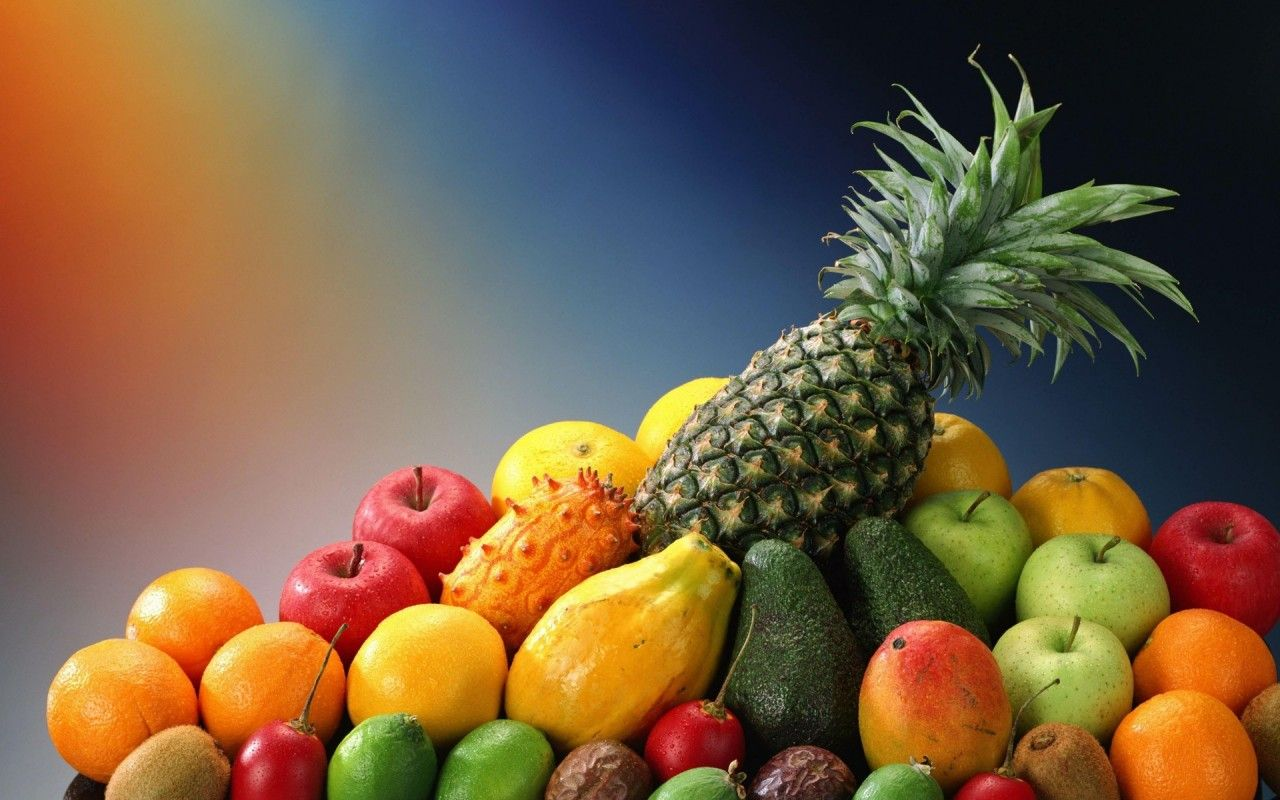

**WHY FRUITS 360 ?**

THE MAIN REASON I CHOSE THIS DATASET IS BECAUSE IT IS A FAIRLY LARGE DATASET WITH CONSIDERABLE NO OF CLASSES FOR AN EXTENSIVE CLASSIFICATION MODEL.
AS A BEGINNER, IN MY LEARNING PHASE I TRY TO USE LARGE DATASETS WITH ENOUGH DIVERSITY TO APPLY MORE CONCEPTS.

In [11]:
data_dir = '/content/fruits/fruits-360_dataset/fruits-360'
print(os.listdir(data_dir))

['Test', 'LICENSE', 'test-multiple_fruits', 'papers', 'Training', 'readme.md']


In [12]:
len(os.listdir(data_dir + '/Training'))

131

*131 IS A VERY GOOD NUMBER IF YOU ARE LOOKING FOR A CLASSIFICATION PROBLEM.*



*FOR NOW, WE ONLY DO A SIMPLE TENSOR TRANSFORM WHILE MAKING AN IMAGE FOLDER OBJECT BECAUSE WE WILL USE THIS TO FIND MEAN AND STANDARD DEVIATIONS FOR IMAGE NORMALISATION*

In [13]:
train_ds = ImageFolder(data_dir + '/Training', tt.ToTensor())

*LET'S TAKE A LOOK AT AN IMAGE TENSOR*

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
train_ds[0]

(tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

*LET'S TAKE A LOOK AT SOME CLASSES*

In [16]:
train_ds.classes[0:10]

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3']

*CREATING A DATALOADER FOR IMAGE VISUALIZATION AND CALCULATING IMAGE MEAN AND STD DEVIATIONS*

In [17]:
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
train_ds[0][0].shape

torch.Size([3, 100, 100])

*WE HAVE 100 X 100 PIXEL IMAGES WITH 3 COLOUR CHANNELS (RGB)*

*HERE, WE DEFINE A HELPER FUNCTION show_example TO VISUALIZE IMAGES*

In [19]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


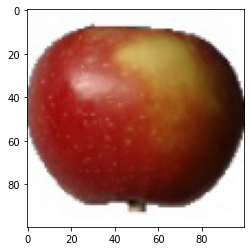

In [20]:
show_example(*train_ds[100])

In [21]:
len(train_ds)

67692

*WE HAVE 67692 IMAGES FOR TRAINING*

*LET'S DEFINE A HELPER TO FUNCTION TO VISUALIZE A FULL BATCH OF IMAGES*

In [22]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(15,20))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
        break

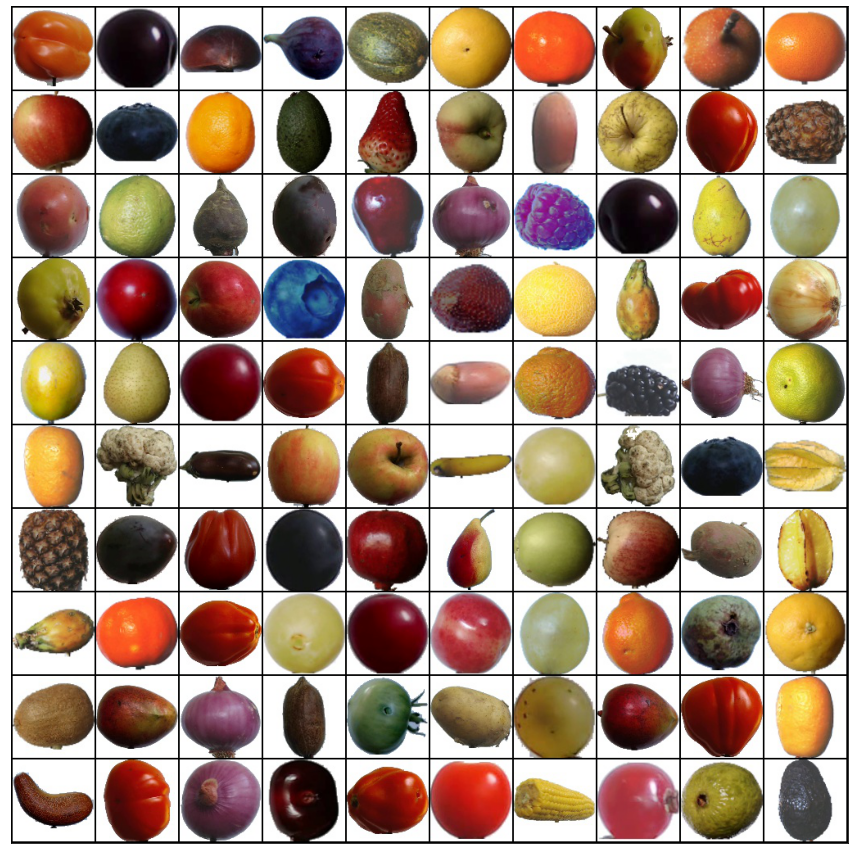

In [23]:
show_batch(train_dl)

*NOTICE THAT WE HAVE GOOD QUALITY IMAGES AND SOMETIMES WHEN GOOD QUALITY IMAGES ARE PASSED DIRECTLY INTO THE MODEL, IT MAY LEAD TO OVERFITTING. WE WILL COUNTER THIS PROBLEM UP NEXT*

In [24]:
def get_mean_std(loader):
  ch_sum, ch_sq_sum, num_batches = 0, 0, 0
  for data,_ in loader:
    ch_sum += torch.mean(data, dim=[0,2,3])
    ch_sq_sum += torch.mean(data**2, dim=[0,2,3])
    num_batches += 1
  mean = ch_sum/num_batches
  std = (ch_sq_sum/num_batches - mean**2)**0.5
  return mean, std

# CALCULATING MEAN AND STD DEVIATION OF IMAGES FOR DATA NORMALISATION

In [25]:
mean, std = get_mean_std(train_dl)

In [26]:
mean

tensor([0.6840, 0.5786, 0.5037])

In [27]:
std

tensor([0.3034, 0.3600, 0.3914])

In [28]:
mean_values = tuple(mean.numpy())
std_values = tuple(std.numpy())

# IMPORTING THE TRAINING AND VALIDATION DATASET USING IMAGEFOLDER METHOD OF PYTORCH AND AUGEMENTING & NORMALISING THE DATA.

*LETS MAKE A NEW IMAGEFOLDER OBJECT BUT NOW WE ALSO PERFORM NORMALISATION AND AUGEMENTATION*

In [29]:
stats = (mean_values, std_values)
train_tfms = tt.Compose([tt.RandomCrop(100, padding=4, padding_mode='reflect'), tt.RandomHorizontalFlip(), tt.ToTensor(),tt.Normalize(*stats,inplace=True)])

*FOR AUGEMENTATION, WE ARE USING RandomCrop WHICH BASICALLY CROPS A RANDOM PART OF THE IAMGE ACC TO THE SPECIFIED PARAMS AND ALSO WE ARE DOING A RandomHorizontalFlip OF THE IMAGES*

**NOTICE THAT WE DON'T NEED TO DO THESE AUGUMENATATON ON THE VALIDATION SET IMAGES.**

In [30]:
train_ds1 = ImageFolder(data_dir + '/Training', train_tfms)

In [31]:
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [32]:
valid_ds = ImageFolder(data_dir+'/Test', valid_tfms)

Label:  Apple Braeburn (0)


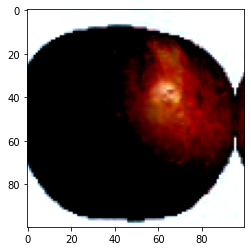

In [33]:
show_example(*train_ds1[0])

*NOTICE HOW MUCH THE IMAGE HAS CHANGED AND THIS CHANGE HELPS A LOT IN MAKING THE MODEL MORE GENERAL.*

*CREATING TRAINING AND VALIDATION DATALOADERS*

# CREATING DATALOADERS TO RETREIVE BATCHES OF IMAGES.

In [34]:
train_dl1 = DataLoader(train_ds1, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [35]:
valid_dl = DataLoader(valid_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [36]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

*THESE dernormalize and show_batch HELPER FUNCTIONS ARE DEFINED TO DISPLAY THE IMAGES AS THEY WERE BEFORE AUGUMENTATION AND NORMALIZATION.*

In [ ]:
show_batch(train_dl1)

In [ ]:
show_batch(valid_dl)

HERE, WE HAVE DEFINED SOME HELPER FUNCTIONS TO SHIFT THE DATALOADERS AND MODELS ON THE GPU TO UTILIZE THE POWER OF GPU.

In [37]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [38]:
device = get_default_device()
device

device(type='cuda')

*HERE OUR DEVICE TYPE IS 'cuda' BECAUSE WE HAVE CHOOSEN RUNTIME TYPE AS GPU, TO DO SO ON GOOGLE COLAB GO TO "Runtime > Change Runtime Type" and select "GPU" from the "Hardware Accelerator" dropdown.*

In [39]:
train_dl1 = DeviceDataLoader(train_dl1, device)

In [40]:
valid_dl = DeviceDataLoader(valid_dl, device)

# EXTENDING THE nn.Module CLASS FOR REQUIRED FUNCTIONS.

**HERE WE HAVE EXTENDED THE nn.Module CLASS TO DEFINE SOME HELPER FUNCTIONS FOR OUR MODEL TRAINING AND EVALUATION.**

In [42]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

# **DEFINING THE MAIN RESNET9 ARCHITECTURE BASED CNN MODEL.**

# RESNET9

*BELOW IMAGE SHOWS A PROPER CLASSICAL RESNET9 ARCHITECTURE*

**I USED A VERY SIMPLE AND COMPACT FORM OF A RESNET9 ARCHITECTURE.**

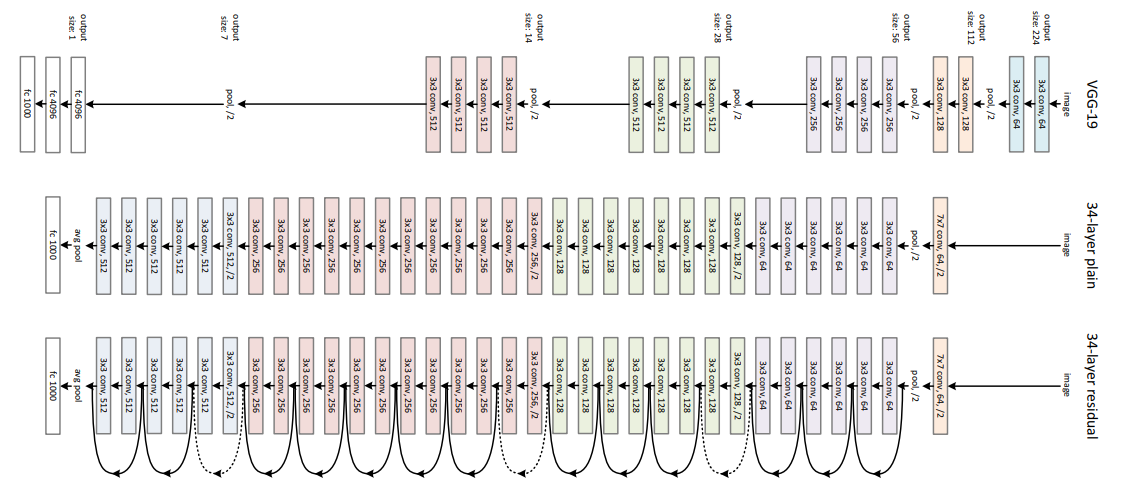

**Residual Block**:

In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Network. In this network we use a technique called skip connections . The skip connection skips training from a few layers and connects directly to the output.

The approach behind this network is instead of layers learn the underlying mapping, we allow network fit the residual mapping. So, instead of say H(x), initial mapping, let the network fit, F(x) := H(x) – x which gives H(x) := F(x) + x.

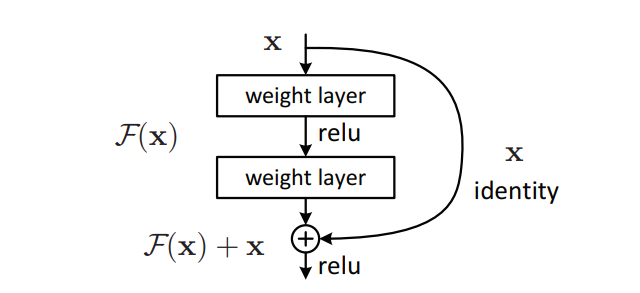

In [43]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2, stride=2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        #100 x 3 x 100 x 100
        self.conv1 = conv_block(in_channels, 64)                                #100 x 64 x 80 x 80
        self.conv2 = conv_block(64, 128, pool=True)                             #100 x 128 x 40 x 40
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))   #100 x 128 x 40 x 40
        
        self.conv3 = conv_block(128, 256, pool=True)                            #100 x 256 x 20 x 20
        self.conv4 = conv_block(256, 512, pool=True)                            #100 x 512 x 10 x 10
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.conv5 = conv_block(512, 1024, pool=True)                           #100 x 1024 x 5 x 5 
        self.conv6 = conv_block(1024, 2048, pool=True)                          #100 x 2048 x 2 x 2
        self.res3 = nn.Sequential(conv_block(2048, 2048), conv_block(2048, 2048))   #100 x 2048 x 2 x 2
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.15),
                                        nn.Linear(2048, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

**CREATING THE MODEL OBJECT AND SHIFTING IT ON THE GPU**

In [44]:
model = to_device(ResNet9(3, 131), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

**HERE WE HAVE DEFINED SOME MORE HELPER FUNCTIONS FOR TRAINING THE MODEL BASED ON LEARNING RATE SCHEDULING, WEIGHT DECAY AND GRADIENT CLIPPING**

->**Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the "One Cycle Learning Rate Policy", which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

->**Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

->**Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48

In [45]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

# TRAINING THE MODEL AND EVALUATING SIMUNTANEOUSLY.

In [47]:
epochs = 6
max_lr = 0.01
grad_clip = 0.101
weight_decay = 1e-4
opt_func = torch.optim.Adam
history = []

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl1, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00603, train_loss: 0.0570, val_loss: 0.9304, val_acc: 0.7927
Epoch [1], last_lr: 0.00994, train_loss: 0.1170, val_loss: 0.2525, val_acc: 0.9344
Epoch [2], last_lr: 0.00812, train_loss: 0.0703, val_loss: 0.1886, val_acc: 0.9462
Epoch [3], last_lr: 0.00463, train_loss: 0.0359, val_loss: 0.0754, val_acc: 0.9831


*WE HAVE ACHEIVED A VERY GOOD 98% ACCURACY ON THE VALIDATION DATASET WHICH THE MODEL HASN'T BEEN TRAINED ON AND IT IS MAJORLY BECAUSE OF THE ABILITY OF CNN TO LEARN NON-LINEAR RELATIONSHIPS AND ALSO BECAUSE OF IMAGE NORMALISATION AND AUGUMENTATION*

NOTE, THE VALIDATION DATASET IS THE TEST DATASET AND WE TESTING THE MODEL ON THE TEST DATASET SIMUNTANEOUSL

In [50]:
# train_time = '1:54'

*THE MODEL TOOK A CONSIDERABLE TIME OF 1HR 54MINUTES TO TRAIN.*

In [51]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    2430 MB |    7067 MB |  256988 GB |  256985 GB |\n|       from large pool |    2420 MB |    7058 MB |  256908 GB |  256905 GB |\n|       from small pool |       9 MB |      11 MB |      79 GB |      79 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    2430 MB |    7067 MB |  256988 GB |  256985 GB |\n|       from large pool |    2420 MB |    7058 MB |

# SAVING THE MODEL USING JOBLIB.

In [52]:
import joblib

In [53]:
model_save2 = {'model' : model, 'train_ds1' : train_ds1, 'valid_ds' : valid_ds, 'train_dl1' : train_dl1, 'valid_dl' : valid_dl, 'history' : history}

In [54]:
joblib.dump(model_save2, 'model_save2.joblib')

['model_save2.joblib']

# PLOTTING MODEL ACCURACY, LOSS AND LEARNING RATES AGAINST NO OF EPOCHS.

In [55]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

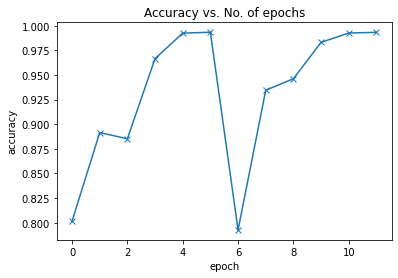

In [56]:
plot_accuracies(history)

In [57]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

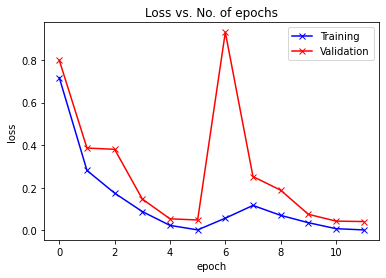

In [58]:
plot_losses(history)

In [59]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

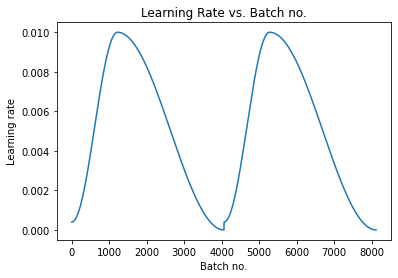

In [60]:
plot_lrs(history)

# TESTING THE MODEL ON INDIVIDUAL IMAGES.

*TESTING YOUR MODEL ON INDIVIDUAL INPUTS IS A VERY IMPORTANT STEP IN ANY ML OR DEEP LEARNING PROJECT CYCLE. YOUR MODEL MAY GIVE YOU A GOOD ACCURACY SCORE ON THE ENTIRE TEST DATATSET BUT IT MAY BREAK OR FAIL TO SUCCEED ON INDIVIDUAL INPUTS AND IN REAL LIFE APPLICATIONS, INDIVIDUAL INPUTS ARE MORE COMMON THAN A WHOLE DATASET.*

In [61]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


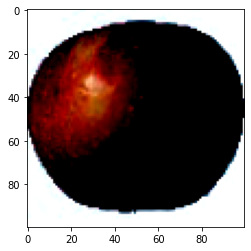

In [64]:
img, label = valid_ds[1]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Cherry Wax Black , Predicted: Cherry Wax Black


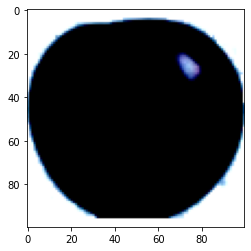

In [70]:
img, label = valid_ds[5001]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Lemon , Predicted: Lemon


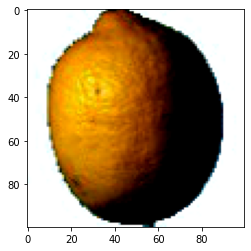

In [68]:
img, label = valid_ds[9999]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))